In [8]:
import numpy as np
import matplotlib.pyplot as plt


1. Plot 10 samples, spaced uniformly in range [0, 1], with the function sin(2πx) with a Gaussian noise like below.

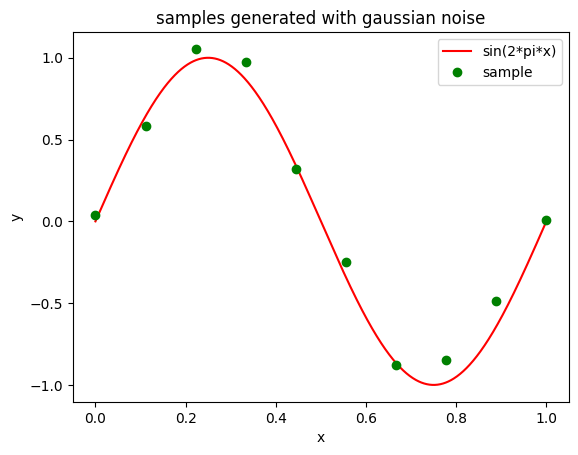

In [9]:
x_line = np.linspace(0,1,1000)
x_noise = np.linspace(0, 1, 10)

#y = sin(2*pi*x)
y_line = np.sin(2*np.pi*x_line)
# np.random.normal(0,0.1,10)에서 10개의 무작위 난수를 추출한 다음 
# np.sin(2*np.pi*x)에서 나온 10개의 y에 이를 더해 noise를 만든다
y_noise = np.sin(2*np.pi*x_noise) + np.random.normal(0,0.1,10)

plt.plot(x_line, y_line, 'r')
plt.plot(x_noise, y_noise, 'go')
plt.legend(["sin(2*pi*x)", "sample"])
plt.title('samples generated with gaussian noise')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

2.  Generate regression lines with polynomial basis function with order 1, 3, 5, 9, and 15.

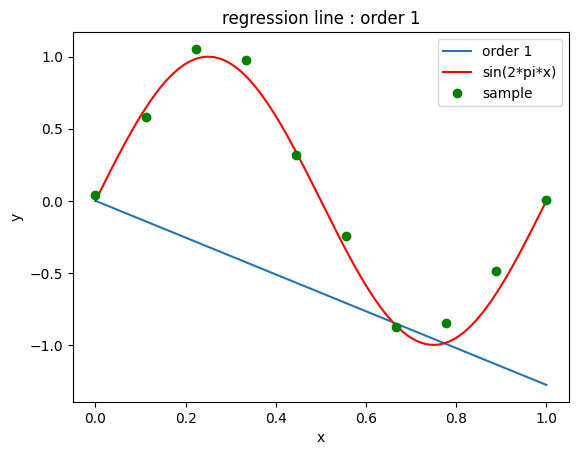

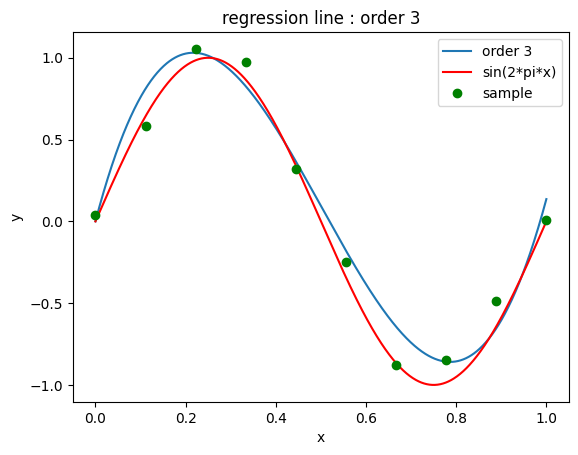

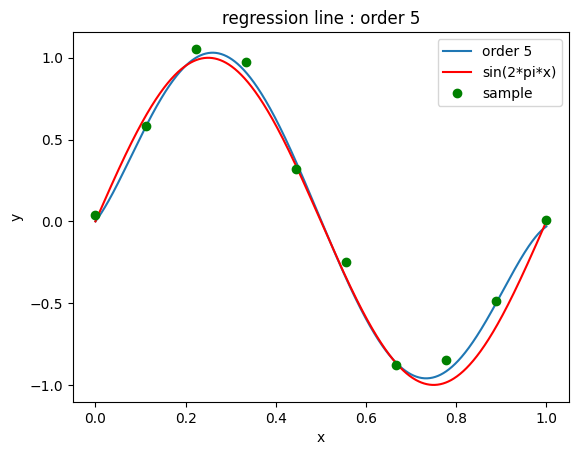

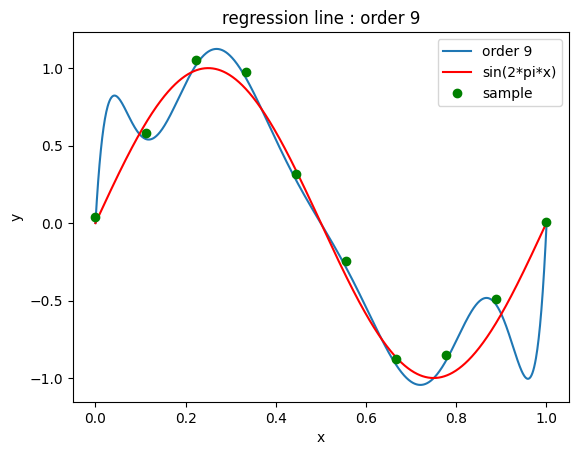

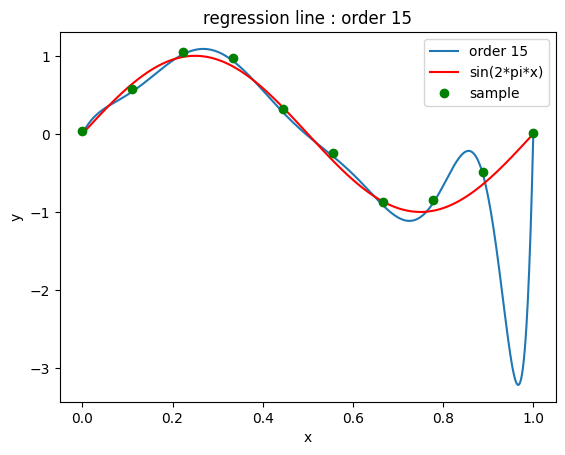

In [10]:
# sklearn의 Linear Regression을 이용했다.
from sklearn.linear_model import LinearRegression

# matrix form으로 각 order에 맞는 train data matrix를 만든다

# python에서 size 같은거는 C++처럼 함수로 불러오는게 아니고 class에 크기가 저장되어있다.

def make_X_poly(x, order):
    ret_X = np.empty((order, x.size))
    for i in range(order):
        ret_X[i] = np.power(x, i+1)
    return np.transpose(ret_X)

X_poly_1 = make_X_poly(x_noise, 1)
X_poly_3 = make_X_poly(x_noise, 3)
X_poly_5 = make_X_poly(x_noise, 5)
X_poly_9 = make_X_poly(x_noise, 9)
X_poly_15 = make_X_poly(x_noise, 15)

lr_poly_1 = LinearRegression().fit(X_poly_1, y_noise)
lr_poly_3 = LinearRegression().fit(X_poly_3, y_noise)
lr_poly_5 = LinearRegression().fit(X_poly_5, y_noise)
lr_poly_9 = LinearRegression().fit(X_poly_9, y_noise)
lr_poly_15 = LinearRegression().fit(X_poly_15, y_noise)

# line을 그리는 곳

def make_regline(lr):
    power = 1
    ret_line = 0
    for i in lr.coef_:
        ret_line += i*(x_line)**power
        power += 1
    return ret_line


def plot_regline(lr, x_sample, y_sample):
    plt.plot(x_line, make_regline(lr))
    plt.plot(x_line, y_line, 'r')
    plt.plot(x_sample, y_sample, 'go')
    plt.title('regression line : order {}'.format(lr.coef_.size))
    plt.legend(["order {}".format(lr.coef_.size),"sin(2*pi*x)","sample"])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

plot_regline(lr_poly_1, x_noise, y_noise)
plot_regline(lr_poly_3, x_noise, y_noise)
plot_regline(lr_poly_5, x_noise, y_noise)
plot_regline(lr_poly_9, x_noise, y_noise)
plot_regline(lr_poly_15, x_noise, y_noise)

3. Add 2 or 3 points of exceptional outliers that do not follow sin(2πx) and then generate regression lines with polynomial basis function with order 1, 3, 5, 9, and 15.    

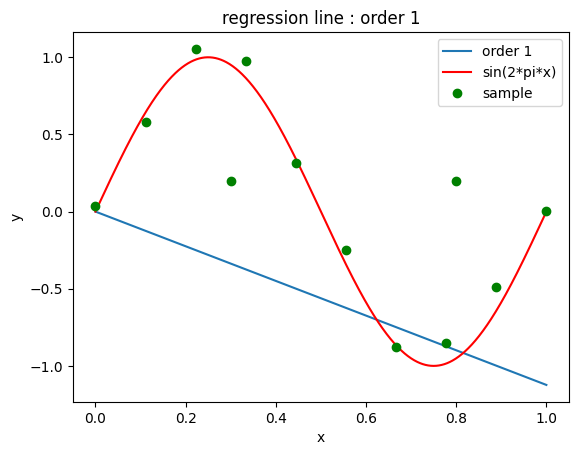

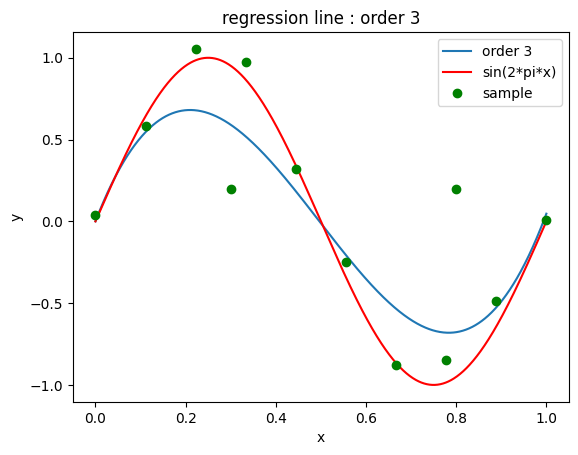

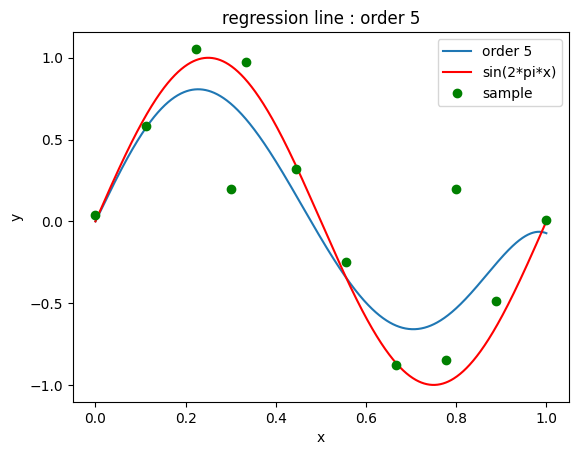

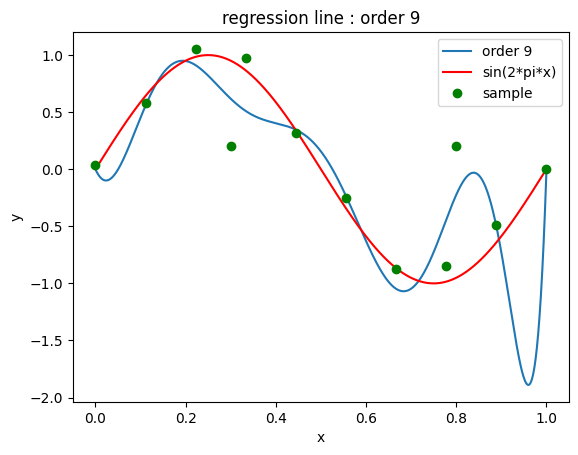

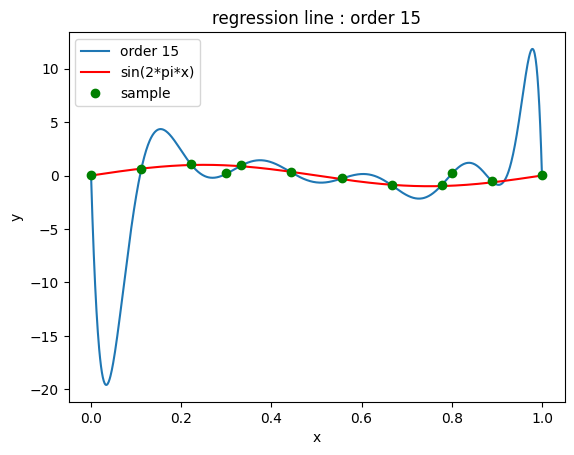

In [11]:
# (0.3,0.2), (0.8,-0.2) 두 outlier를 추가한다.
x_except = np.append(x_noise, np.array([0.3, 0.8]))
y_except = np.append(y_noise, np.array([0.2,0.2]))


# 그리고 이를 바탕으로 다시 linear regression line을 만든다.

X_poly_1_except = make_X_poly(x_except, 1)
X_poly_3_except = make_X_poly(x_except, 3)
X_poly_5_except = make_X_poly(x_except, 5)
X_poly_9_except = make_X_poly(x_except, 9)
X_poly_15_except = make_X_poly(x_except, 15)

lr_poly_1_except = LinearRegression().fit(X_poly_1_except, y_except)
lr_poly_3_except = LinearRegression().fit(X_poly_3_except, y_except)
lr_poly_5_except = LinearRegression().fit(X_poly_5_except, y_except)
lr_poly_9_except = LinearRegression().fit(X_poly_9_except, y_except)
lr_poly_15_except = LinearRegression().fit(X_poly_15_except, y_except)

# line을 그리는 곳

plot_regline(lr_poly_1_except, x_except, y_except)
plot_regline(lr_poly_3_except, x_except, y_except)
plot_regline(lr_poly_5_except, x_except, y_except)
plot_regline(lr_poly_9_except, x_except, y_except)
plot_regline(lr_poly_15_except, x_except, y_except)

 4. For the case including the outliers, generate the regression lines with the L2 regularization term with order 9 and  15.  Show  how  the  lines  are  changed  with  respect  to  λ . Generate  the  regression  lines  with  the  L1 regularization term and compare the lines with L2 regularization.

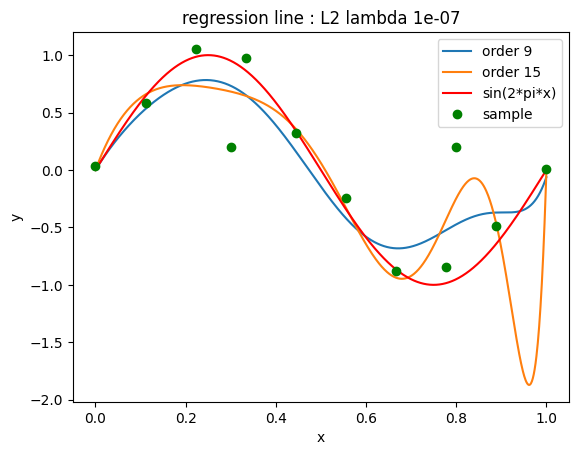

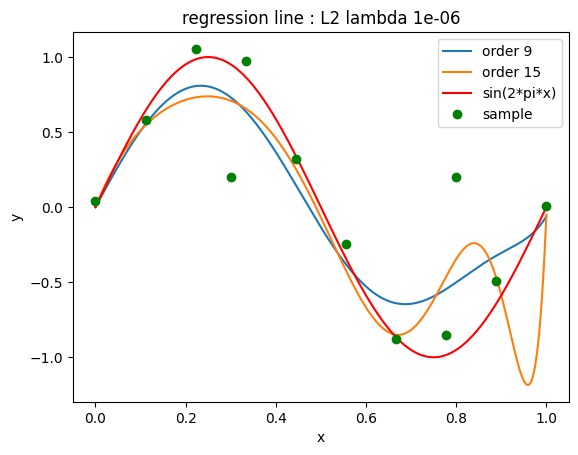

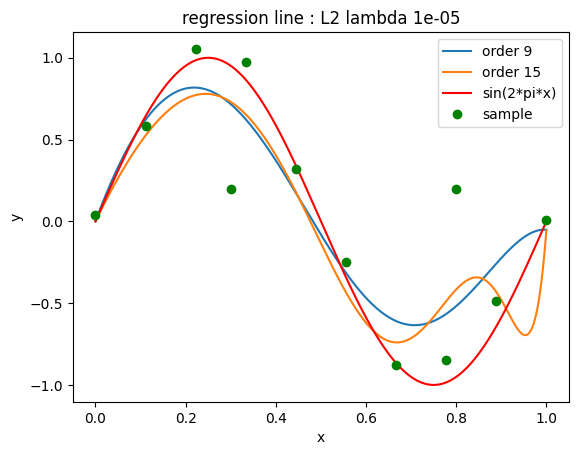

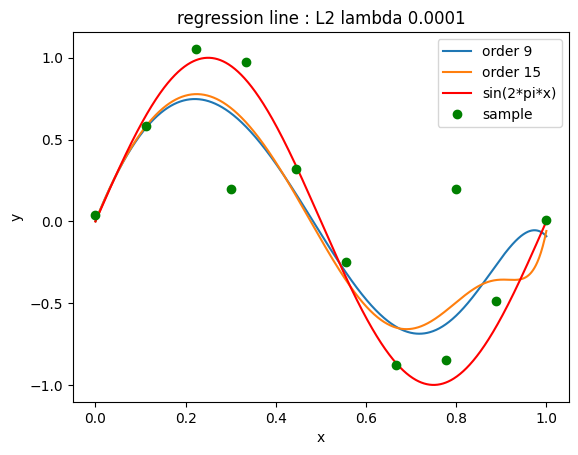

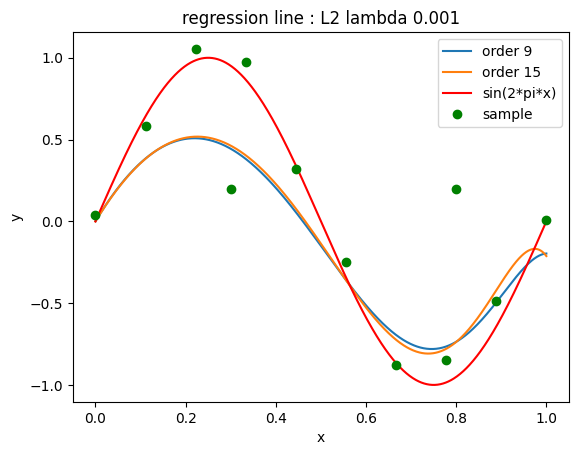

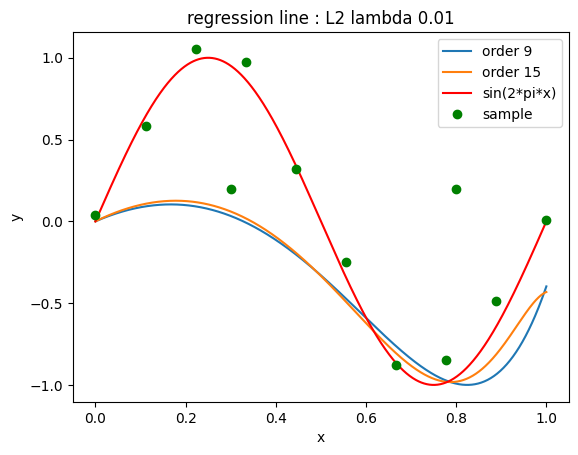

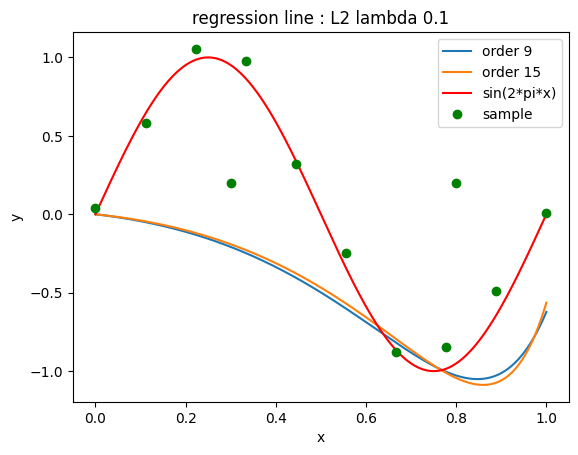

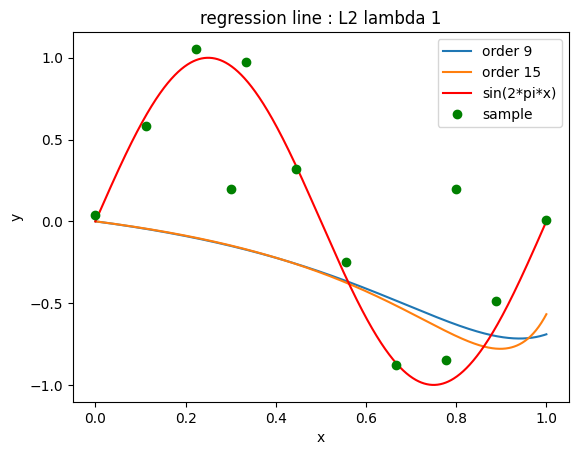

In [12]:
# L2 regularization : Ridge L1 regularization : Lasso

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

X_poly_9_Ridge = make_X_poly(x_except, 9)
X_poly_15_Ridge = make_X_poly(x_except, 15)


def plot_regline_ver2(lr1, lr2, title, legend):
    plt.plot(x_line, make_regline(lr1))
    plt.plot(x_line, make_regline(lr2))
    plt.plot(x_line, y_line, 'r')
    plt.plot(x_except, y_except, 'go')
    plt.title(title)
    plt.legend(legend)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# 람다 값에 따라 달라지는 regression line
lamList = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]

for i in lamList:
    lr_poly_9_Ridge = Ridge(alpha=i).fit(X_poly_9_Ridge, y_except)
    lr_poly_15_Ridge = Ridge(alpha=i).fit(X_poly_15_Ridge, y_except)
    legend_1 = ["order {}".format(lr_poly_9_Ridge.coef_.size),
                "order {}".format(lr_poly_15_Ridge.coef_.size),"sin(2*pi*x)","sample"]
    title = "regression line : L2 lambda {}".format(i)
    plot_regline_ver2(lr_poly_9_Ridge, lr_poly_15_Ridge, title, legend_1)


c:\Users\saych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.979e-01, tolerance: 4.305e-04
  model = cd_fast.enet_coordinate_descent(


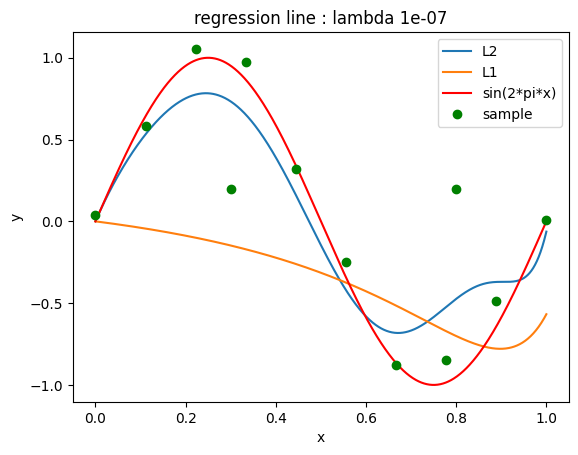

c:\Users\saych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.184e-01, tolerance: 4.305e-04
  model = cd_fast.enet_coordinate_descent(


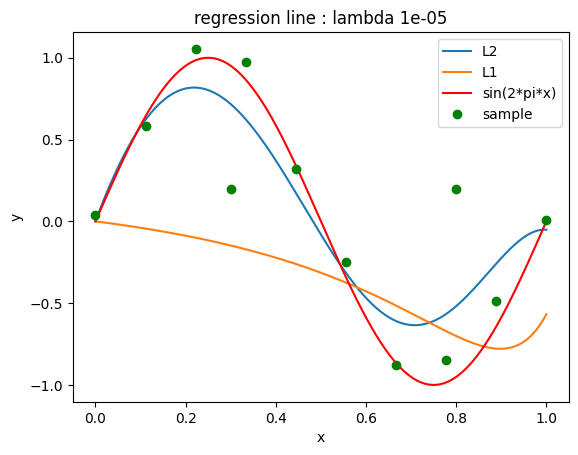

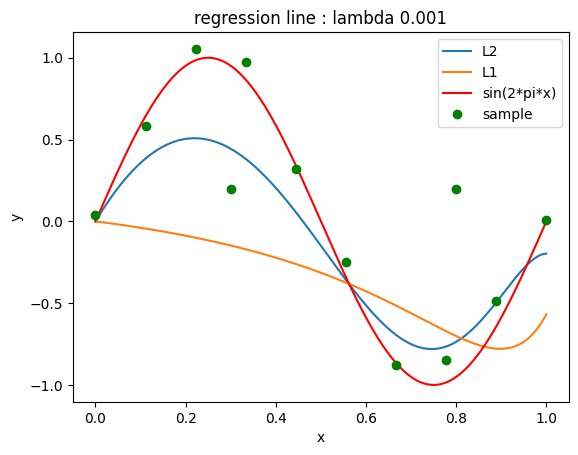

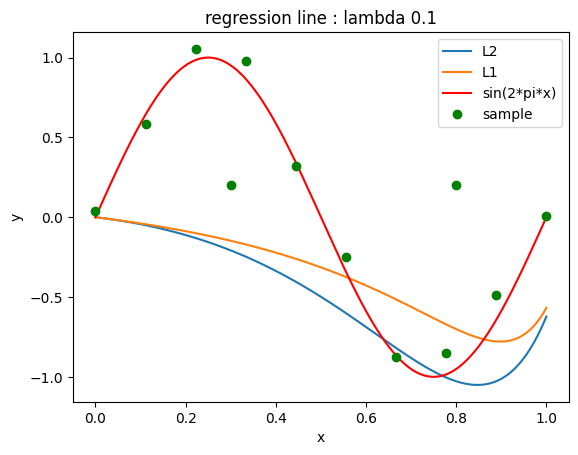

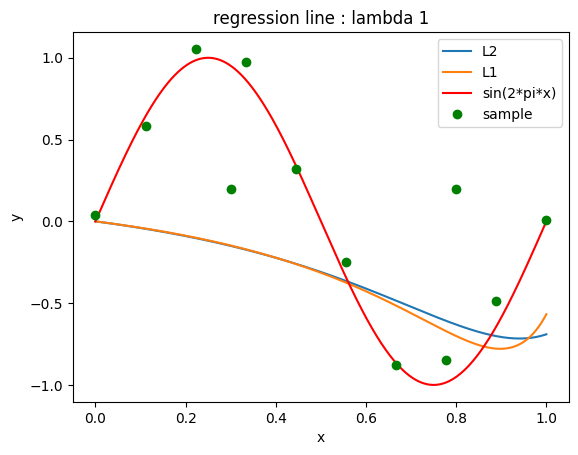

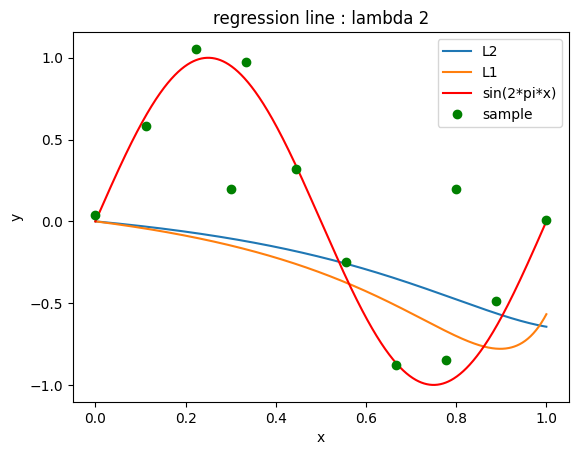

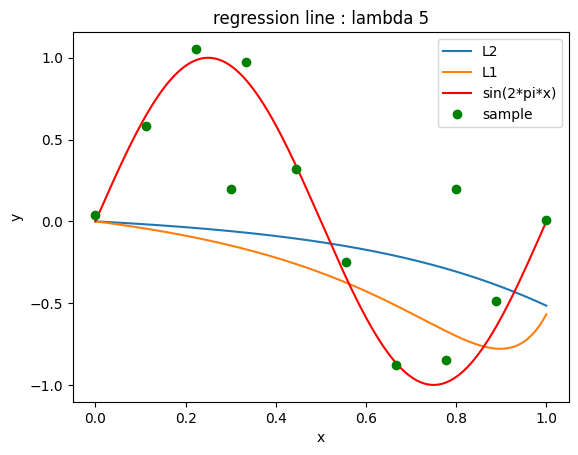

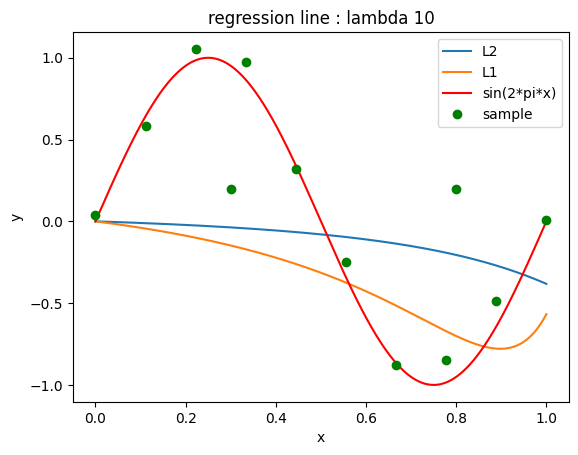

In [13]:
# L2 regularization과 L1 regularization간의 차이
lamList_2 = [0.0000001, 0.00001, 0.001, 0.1, 1, 2, 5, 10]
for i in lamList_2:
    lr_poly_9_Ridge = Ridge(alpha=i).fit(X_poly_9_Ridge, y_except)
    lr_poly_9_Lasso = Lasso(alpha=i, max_iter=10000).fit(X_poly_9_Ridge, y_except)
    title = "regression line : lambda {}".format(i)
    legend_2 = ["L2", "L1", "sin(2*pi*x)","sample"]
    plot_regline_ver2(lr_poly_9_Ridge, lr_poly_15_Ridge, title, legend_2)

5. Plot 100 samples with the function sin(2πx) instead of 10 samples, and then generate the regression lines with order 1, 3, 5, 9, and 15.

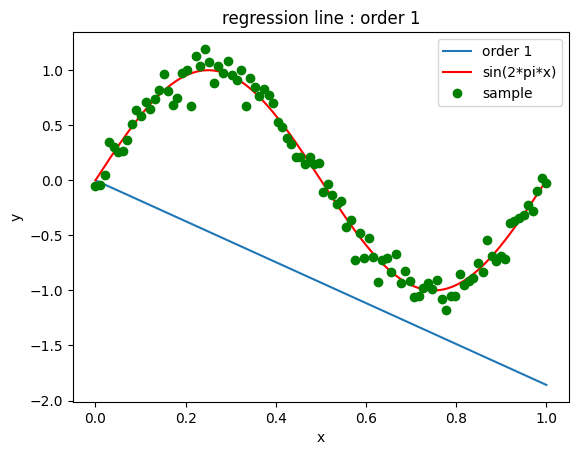

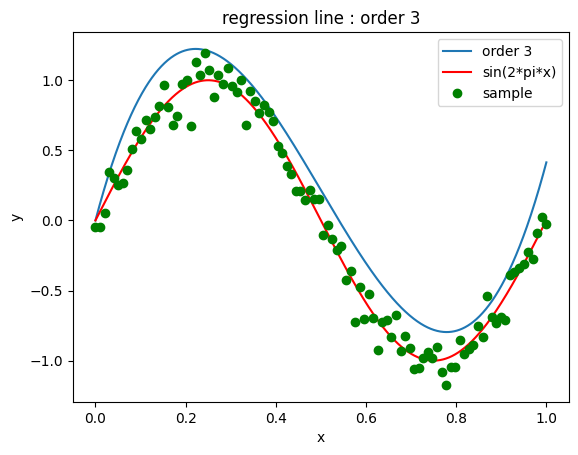

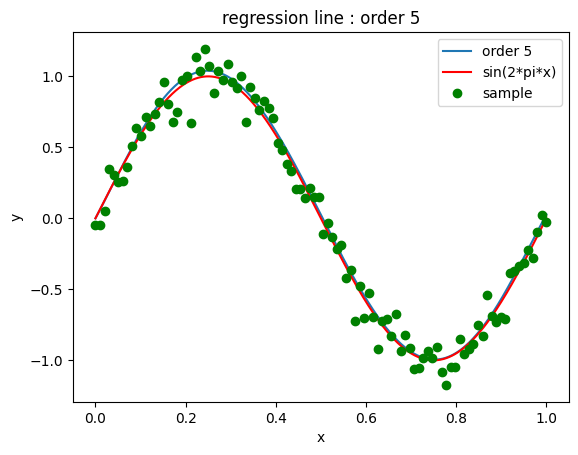

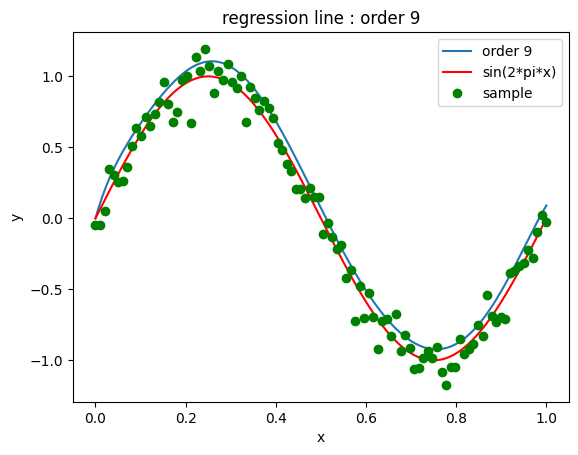

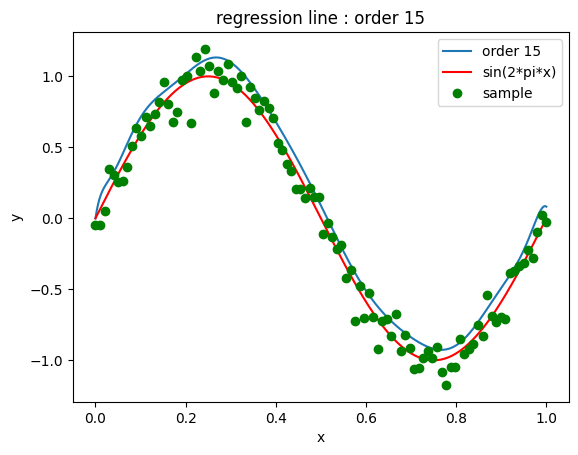

In [14]:
x_noise_100 = np.linspace(0,1,100)
y_noise_100 = np.sin(2*np.pi*x_noise_100) + np.random.normal(0,0.1,100)

X_100_poly_1 = make_X_poly(x_noise_100, 1)
X_100_poly_3 = make_X_poly(x_noise_100, 3)
X_100_poly_5 = make_X_poly(x_noise_100, 5)
X_100_poly_9 = make_X_poly(x_noise_100, 9)
X_100_poly_15 = make_X_poly(x_noise_100, 15)

lr_100_poly_1 = LinearRegression().fit(X_100_poly_1, y_noise_100)
lr_100_poly_3 = LinearRegression().fit(X_100_poly_3, y_noise_100)
lr_100_poly_5 = LinearRegression().fit(X_100_poly_5, y_noise_100)
lr_100_poly_9 = LinearRegression().fit(X_100_poly_9, y_noise_100)
lr_100_poly_15 = LinearRegression().fit(X_100_poly_15, y_noise_100)

plot_regline(lr_100_poly_1, x_noise_100, y_noise_100)
plot_regline(lr_100_poly_3, x_noise_100, y_noise_100)
plot_regline(lr_100_poly_5, x_noise_100, y_noise_100)
plot_regline(lr_100_poly_9, x_noise_100, y_noise_100)
plot_regline(lr_100_poly_15, x_noise_100, y_noise_100)